# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [44]:
# Write your answer here:
print("Emory ID 2561533")

Emory ID 2561533


<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numpy", "statsmodels.api", and "statsmodels.formula.api" libraries

In [45]:
# Write your answer here:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [46]:
# Write your answer here
features = pd.read_csv("Data/features.csv")
check_horsepower = lambda horrsepower: horsepower > 100
features['horsepower'] = pd.to_numeric(features['horsepower'], errors='coerce')
features['horsepower_check'] = features['horsepower'].apply(lambda x: x > 100)
cars_above = features['horsepower_check'].sum()
print(cars_above)

150


<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [47]:
# Write your answer here:
features = pd.read_csv("Data/features.csv")
threshold = 3000
subset_above = features.query('weight > @threshold')
subset_below = features.query('weight <= @threshold')

larger_weight = subset_above['acceleration'].mean()
below_weight = subset_below['acceleration'].mean()

print(larger_weight)
print(below_weight)

14.7
16.202173913043477


<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

Intercept    19.606158
weight       -0.001359
dtype: float64


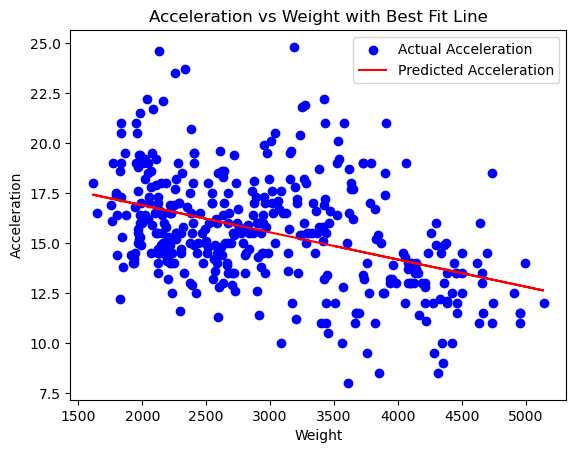

In [48]:
# Write your answer here:

model = smf.ols(formula='acceleration ~ weight', data=features)
results = model.fit()

b_list = results.params
print(b_list)

features["predicted_acceleration"] = b_list.iloc[0] + b_list.iloc[1] * features["weight"]

plt.scatter(x=features["weight"], y=features["acceleration"], color='blue', label='Actual Acceleration')
plt.plot(features["weight"], features["predicted_acceleration"], color='red', label='Predicted Acceleration')

plt.legend(labels=["Actual Acceleration", "Predicted Acceleration"])
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.title("Acceleration vs Weight with Best Fit Line")

plt.show()

<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [49]:
# Write your own code
data = pd.read_csv('Data/fifa23_players_basic.csv')
agesorted  = data.sort_values(by = "Age", ascending = True)
subset = agesorted.head(5)
print(subset)



            Known As        Full Name  ...  Attacking Work Rate  \
17956     A. Dithmer  Andreas Dithmer  ...               Medium   
18014      J. Ardila      José Ardila  ...               Medium   
16084       S. Ngoma      Serge Ngoma  ...                 High   
11481      O. Vargas      Obed Vargas  ...                 High   
17591  A. Madaliński  Alan Madaliński  ...               Medium   

       Defensive Work Rate  
17956               Medium  
18014               Medium  
16084               Medium  
11481               Medium  
17591               Medium  

[5 rows x 32 columns]


<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [50]:
# Write your own code

mean = data["Value(in Euro)"].mean()
subset2 = data.query("`Value(in Euro)` > @mean")
print(subset2)



            Known As           Full Name  ...  Attacking Work Rate  \
0           L. Messi        Lionel Messi  ...                  Low   
1         K. Benzema       Karim Benzema  ...               Medium   
2     R. Lewandowski  Robert Lewandowski  ...                 High   
3       K. De Bruyne     Kevin De Bruyne  ...                 High   
4          K. Mbappé       Kylian Mbappé  ...                 High   
...              ...                 ...  ...                  ...   
7066       F. Rieder       Fabian Rieder  ...                 High   
7071     J. Bakayoko      Johan Bakayoko  ...                 High   
7090        M. Arezo        Matías Arezo  ...                 High   
7096       Y. Kallon        Yayah Kallon  ...                 High   
7168        M. Soulé        Matías Soulé  ...                 High   

      Defensive Work Rate  
0                     Low  
1                  Medium  
2                  Medium  
3                    High  
4                  

<font size = "5">